## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [2]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [5]:
# Load the dataset
file_path = 'LoanStatus.csv'
df = pd.read_csv(file_path)

# Print descriptive statistics for the fields of interest
interested_columns = ['Education', 'Credit_History']
print(df[interested_columns].describe())

       Credit_History
count      564.000000
mean         0.842199
std          0.364878
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000


In [6]:
# Count the number of blank values in each column
print(df.isnull().sum())

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64


## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [9]:
# ა: Probability of getting a loan based on Loan_Status
loan_probability = df['Loan_Status'].value_counts(normalize=True)
print("Probability of getting a loan:", loan_probability.get('Y', 0))

Probability of getting a loan: 0.6872964169381107


In [10]:
# ბ: Probability of getting a loan while having a good credit history
good_credit = df[df['Credit_History'] == 1]
prob_good_credit = good_credit['Loan_Status'].value_counts(normalize=True)
print("Probability of getting a loan with good credit history:", prob_good_credit.get('N', 0))

Probability of getting a loan with good credit history: 0.20421052631578948


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

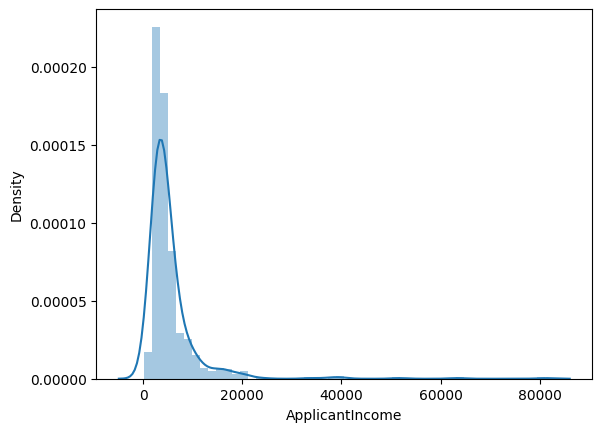

In [17]:
# ა: Seaborn plot for a column
sns.distplot(df['ApplicantIncome'].dropna())
plt.show()

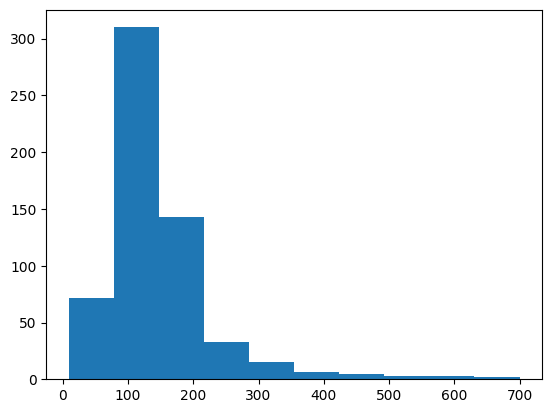

In [19]:
# ბ: Matplotlib histogram for a column
plt.hist(df['LoanAmount'].dropna(), bins=10)
plt.show()

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [20]:
from scipy.stats import norm

In [25]:
mean_income = df['ApplicantIncome'].mean()
std_dev_income = df['ApplicantIncome'].std()

# Cumulative probability for income less than 2000 euros
cum_prob = norm.cdf(2000, mean_income, std_dev_income)
print("Cumulative probability:", cum_prob)

Cumulative probability: 0.28872328177095585


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

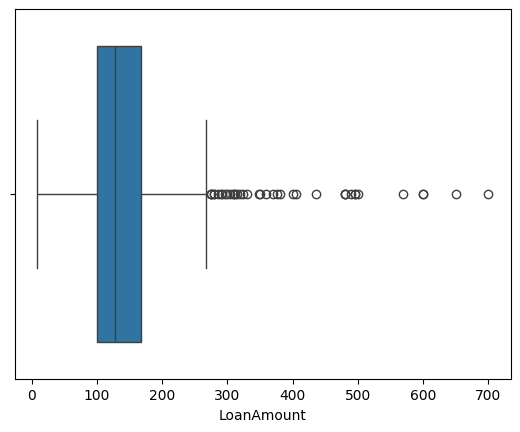

In [33]:
sns.boxplot(x=df['LoanAmount'])
plt.show()

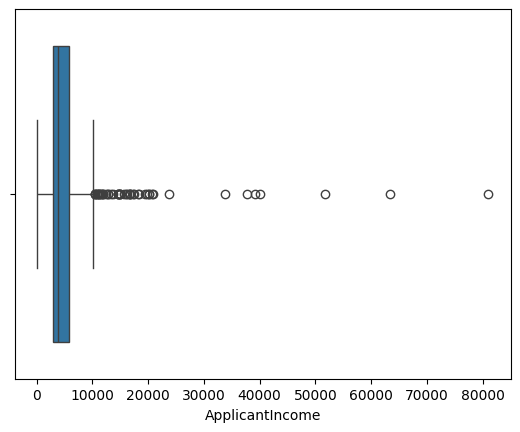

In [32]:
sns.boxplot(x=df['ApplicantIncome'])
plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [56]:
from scipy.stats import ttest_1samp,ttest_ind

In [57]:
import numpy as np

In [59]:
# Calculate the mean of ApplicantIncome
mean_income = df['ApplicantIncome'].mean()

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(df['ApplicantIncome'], mean_income)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: 0.0, P-value: 1.0


In [60]:
# Filter the data for 'Urban' and 'Rural' property areas
urban_income = df[df['Property_Area'] == 'Urban']['ApplicantIncome']
rural_income = df[df['Property_Area'] == 'Rural']['ApplicantIncome']

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(urban_income, rural_income, nan_policy='omit')
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: -0.2307590143060417, P-value: 0.8176265378139956
